In [1]:
import requests 
import requests_cache  
import pandas as pd
import numpy as np
from api_key import key  #API key for Walmart
requests_cache.install_cache('mycache') 

In [2]:
import timeit #Test for time.

In [8]:
#Top trending/popular items name
def popularity():
    ''' Using the Walmart Trending API, we extracted the top 25 bestselling items on Walmart.com
        in descending order. 
        
    Return(s): 
    df_pop -- DataFrame consisting of item name, brand name, item ID, sale prices,
              average of customer ratings, total number of reviews and how you can buy the item
              (store,online or both).
    '''
    popular = requests.get("http://api.walmartlabs.com/v1/trends",params ={"apiKey":key})
    materials = popular.json()['items']
    col_names = ['Item Name','Brand','ItemID','Sale Price','Customer Ratings','Number of Reviews','Offer Type']
    #Item name list
    names = [materials[i]['name'] for i in range(len(materials))] 
    #Consider if the product has customer ratings/num reviews/brand name/item ID/price
    #and then either append or append 'None' for if else.
    
    #Brand name list
    brand = [materials[i]['brandName'] if 'brandName' in materials[i].keys() 
             else 'None' for i in range(len(materials))]    
    #Item IDs list
    item_IDs = [materials[i]['itemId'] if 'itemId' in materials[i].keys() 
                else 'None'for i in range(len(materials))]     
    #Sale price list
    prices = [materials[i]['salePrice'] if 'salePrice' in materials[i].keys() 
              else 'None'for i in range(len(materials))] 
    #How can item be bought list 
    off_type = [materials[i]['offerType'] if 'offerType' in materials[i].keys() 
                else 'None' for i in range(len(materials))]  
    #Customer ratings list
    cust_rates = [materials[i]['customerRating'] if 'customerRating' in materials[i].keys() 
                  else 'None'for i in range(len(materials))]
    #Number of reviews for item list
    num_reviews = [materials[i]['numReviews'] if 'numReviews' in materials[i].keys() 
                   else 'None' for i in range(len(materials))]
      
    df_pop = pd.DataFrame(list(zip(names,brand,item_IDs,prices,cust_rates,num_reviews,off_type)), columns = col_names)
    return df_pop

#%timeit for x in range(10): popularity()
popularity()

,Item Name,Brand,ItemID,Sale Price,Customer Ratings,Number of Reviews,Offer Type
0,Sony PlayStation 4 Pro 1TB Star Wars Battlefro...,Sony,464936459,399.00,4.8,5,ONLINE_AND_STORE
1,Microsoft Xbox One Bluetooth Wireless Controll...,Microsoft,111779721,39.00,4.572,145,ONLINE_AND_STORE
2,Thor: Ragnarok (Cinematic Universe Edition) (4...,Buena Vista Home Entertainment,482746173,29.96,None,None,ONLINE_AND_STORE
3,"Nintendo Switch Console with Gray Joy-Con, 045...",Nintendo,55449983,299.00,4.742,124,ONLINE_AND_STORE
4,"""Sceptre 32"""" Class HD (720P) LED TV (X322BV-SR)""",Sceptre,55427159,99.99,4.301,366,ONLINE_ONLY
5,"Dorel Twin Over Full Metal Bunk Bed, Multiple ...",Dorel,11004672,139.00,4.429,2571,ONLINE_AND_STORE
6,"Sony PlayStation 4 Slim 500GB Gaming Console, ...",Sony,536117094,269.00,4.0,1,ONLINE_AND_STORE
7,"Mainstays Storage Cabinet, Multiple Finishes",Mainstays,20666620,59.00,3.572,1498,ONLINE_AND_STORE
8,"Grand Theft Auto V, Rockstar Games, Xbox One, ...",Rockstar Games,41049187,29.99,4.773,97,ONLINE_AND_STORE
9,"Cosco Scenera NEXT Convertible Car Seat, Otto",Cosco,41126739,34.88,4.401,1011,ONLINE_AND_STORE


In [15]:
# Sub-categories of each department.
def sub_taxonomy():
    ''' Using the Walmart Taxonomy API, we try to extract all sub-categories of each department 
        and some sub-categories of the sub-categories if it exist. 
    
    Return(s):
    df_dept -- Dataframe consisting of columns category IDs(basically department IDs),the name of the 
               sub-category, how to search for it using the search path and the department category 
               belongs to. 
    '''
    taxonomy =  requests.get("http://api.walmartlabs.com/v1/taxonomy", params = {"apiKey":key}) 
    info_col = ['Category Ids','Sub-Category','Specific Path','Department']
    ids = []            #Category Ids list
    spec_item = []      #Sub-categories for all the departments list
    paths = []          #Specific search path list
    names = []          #Department names list 
    
    #First for loop is used to get the department names and ids.
    #Second for loop is used for sub-categorie names and search path.
    #Third for loop is used only when a sub-categorie has more than one sub-sub categorie to extract
    #specific path and name.
    
    tax_j = taxonomy.json()['categories'] #Need to take out information out of nested dict. 
    
    for i in range(len(tax_j)):
        for j in range(len(tax_j[i]['children'])):
            if len(tax_j[i]['children'][j]) == 3:
                ids.append(tax_j[i]['id'])
                spec_item.append(tax_j[i]['children'][j]['name'])
                paths.append(tax_j[i]['children'][j]['path'])
                names.append(tax_j[i]['name'])
            else:
                for k in range(len(tax_j[i]['children'][j]['children'])):
                    ids.append(tax_j[i]['id'])
                    spec_item.append(tax_j[i]['children'][j]['children'][k]['name'])
                    paths.append(tax_j[i]['children'][j]['children'][k]['path'])
                    names.append(tax_j[i]['name'])
    df_dept = pd.DataFrame(list(zip(ids,spec_item,paths,names)), columns = info_col)
    return df_dept


sub_taxonomy()

,Category Ids,Sub-Category,Specific Path,Department
0,1334134,Adult Coloring Books,"Arts, Crafts & Sewing/Art & Drawing Supplies/A...","Arts, Crafts & Sewing"
1,1334134,All Art Supplies,"Arts, Crafts & Sewing/Art & Drawing Supplies/A...","Arts, Crafts & Sewing"
2,1334134,Art Tool Cleaners,"Arts, Crafts & Sewing/Art & Drawing Supplies/A...","Arts, Crafts & Sewing"
3,1334134,Art Tools,"Arts, Crafts & Sewing/Art & Drawing Supplies/A...","Arts, Crafts & Sewing"
4,1334134,Boards & Canvas,"Arts, Crafts & Sewing/Art & Drawing Supplies/B...","Arts, Crafts & Sewing"
5,1334134,Coloring Books,"Arts, Crafts & Sewing/Art & Drawing Supplies/C...","Arts, Crafts & Sewing"
6,1334134,Drawing & Illustration,"Arts, Crafts & Sewing/Art & Drawing Supplies/D...","Arts, Crafts & Sewing"
7,1334134,Drawing Tools & Accessories,"Arts, Crafts & Sewing/Art & Drawing Supplies/D...","Arts, Crafts & Sewing"
8,1334134,Painting,"Arts, Crafts & Sewing/Art & Drawing Supplies/P...","Arts, Crafts & Sewing"
9,1334134,Sketchbooks & Paper,"Arts, Crafts & Sewing/Art & Drawing Supplies/S...","Arts, Crafts & Sewing"


In [4]:
# Sub-categories of departments count
sub_taxonomy()['Department'].value_counts()

Books                      323
Clothing                   184
Baby                       149
Jewelry                    147
Home Improvement           123
Music on CD or Vinyl       119
Auto & Tires               117
Health                     115
Home                       111
Food                       110
Toys                        99
Video Games                 96
Arts, Crafts & Sewing       94
Electronics                 92
Patio & Garden              88
Pets                        82
Sports & Outdoors           71
Movies & TV Shows           70
Walmart for Business        56
Musical Instruments         56
Office                      52
Beauty                      49
Cell Phones                 47
Seasonal                    46
Party & Occasions           38
Personal Care               38
Household Essentials        34
Industrial & Scientific     25
Photo Center                 1
Gifts & Registry             1
Name: Department, dtype: int64

In [16]:
def specific(taxes): 
    ''' Using Walmart Search API,we extracted almost all products on Walmart.com from
        the Taxonomy API.
    Arguement(s):
    taxes -- dataframe containing sub-categories
    
    Return(s):
    df_specs -- Dataframe containing specific item names, the item's ID, price, rating out of 5,
                total number of reviews for product, how to buy, and which department it belongs to. 
    '''
    col_names2 = ['Item Name','ItemID','Sale Price','Customer Ratings','Number of Reviews','Offer Type','Department']
    item_IDs = []
    names = []
    prices = []
    rates = []
    reviews = []
    offs = []
    paths = [] 
    #First for loop extracts all the items in the sub-categories. 
    #Second for loop extracts information from EVERY item in the sub-categories. 
    for i in range(len(taxes['Category Ids'].tolist())):
        searcher = requests.get('http://api.walmartlabs.com/v1/search',params = {
            "apiKey":key,
            "query":taxes['Sub-Category'].tolist()[i],
            "categoryId":taxes['Category Ids'].tolist()[i]
        })
        
        sea_j = searcher.json() #Define a variable for .json() for convenience.
        
        if 'items' in sea_j.keys():  #Consider if there are any items under sub-category.
            for j in range(len(sea_j['items'])):
                #Consider only when the item has ratings, a set amount of reviews and know how to buy. 
                if set(('customerRating','salePrice','numReviews','offerType')).issubset(sea_j['items'][j]):
                    item_IDs.append(sea_j['items'][j]['itemId'])
                    names.append(sea_j['items'][j]['name'])
                    prices.append(sea_j['items'][j]['salePrice'])
                    offs.append(sea_j['items'][j]['offerType'])
                    rates.append(sea_j['items'][j]['customerRating'])
                    reviews.append(sea_j['items'][j]['numReviews'])   
                    paths.append(sea_j['items'][j]['categoryPath'].split('/')[0])
        else:    #Do not do anything if no items. 
            pass
    df_specs = pd.DataFrame(list(zip(names,item_IDs,prices,rates,reviews,offs,paths)), columns = col_names2)
    df_specs
    return df_specs

specific(sub_taxonomy())

,Item Name,ItemID,Sale Price,Customer Ratings,Number of Reviews,Offer Type,Department
0,The World of Debbie Macomber: Come Home to Col...,50092278,13.56,5.0,5,ONLINE_AND_STORE,"Arts, Crafts & Sewing"
1,Johanna's Christmas: A Festive Coloring Book f...,53595316,11.07,4.8,5,ONLINE_AND_STORE,Toys
2,Calm the F*ck Down: An Inappropriate and Humor...,53248591,6.99,5.0,4,ONLINE_ONLY,"Arts, Crafts & Sewing"
3,Country Scenes Adult Coloring Book,33940493,5.99,4.55,20,ONLINE_ONLY,"Arts, Crafts & Sewing"
4,Joyful Designs Artist's Adult Coloring Book,41676502,3.99,4.5,12,ONLINE_ONLY,Toys
5,Adult Coloring Book: Cool Words: Coloring Book...,53247358,4.94,4.0,5,ONLINE_ONLY,"Arts, Crafts & Sewing"
6,Adult Coloring Books: Mandalas: Coloring Books...,53238574,4.84,5.0,2,ONLINE_ONLY,"Arts, Crafts & Sewing"
7,US Art Supply 82 Piece Deluxe Artist Studio Cr...,52592472,17.96,3.5,2,ONLINE_ONLY,"Arts, Crafts & Sewing"
8,US Art Supply 24pc Oil & Acrylic Paint Long Ha...,42741694,14.96,4.5,10,ONLINE_ONLY,"Arts, Crafts & Sewing"
9,US Art Supply 132-Piece Deluxe Artist Painting...,46647361,109.96,4.8,5,ONLINE_ONLY,"Arts, Crafts & Sewing"


In [40]:
import os
data = pd.read_excel(os.path.join("/Users/tommylee/Desktop/Walmart_Locations.xlsx"),header = [0])
data = data[['City','Address','State','Zip']]
data_CA = data[data['State'].str.contains('CA') == True].reset_index()
data_zips = data_CA.Zip.astype(int).astype(str)

In [194]:
import zipcode
lats = []
lons = []
for i in data_zips:
    lats.append(zipcode.isequal(i).lat)
    lons.append(zipcode.isequal(i).lon)

latties = pd.DataFrame(np.array(lats).reshape(len(data_zips),1), columns = ['Lats'])
lonnies = pd.DataFrame(np.array(lons).reshape(len(data_zips),1), columns = ['Lons'])
geo_final = pd.concat([latties,lonnies],axis = 1)
final_city = pd.concat([data_CA,geo_final],axis = 1)

geometry = [Point(xy) for xy in zip(geo_final.Lons, geo_final.Lats)]
geo_final = geo_final.drop(['Lons', 'Lats'], axis=1)
crs = {'init': 'epsg:4326'}
gdf = GeoDataFrame(geo_final, crs=crs, geometry=geometry)

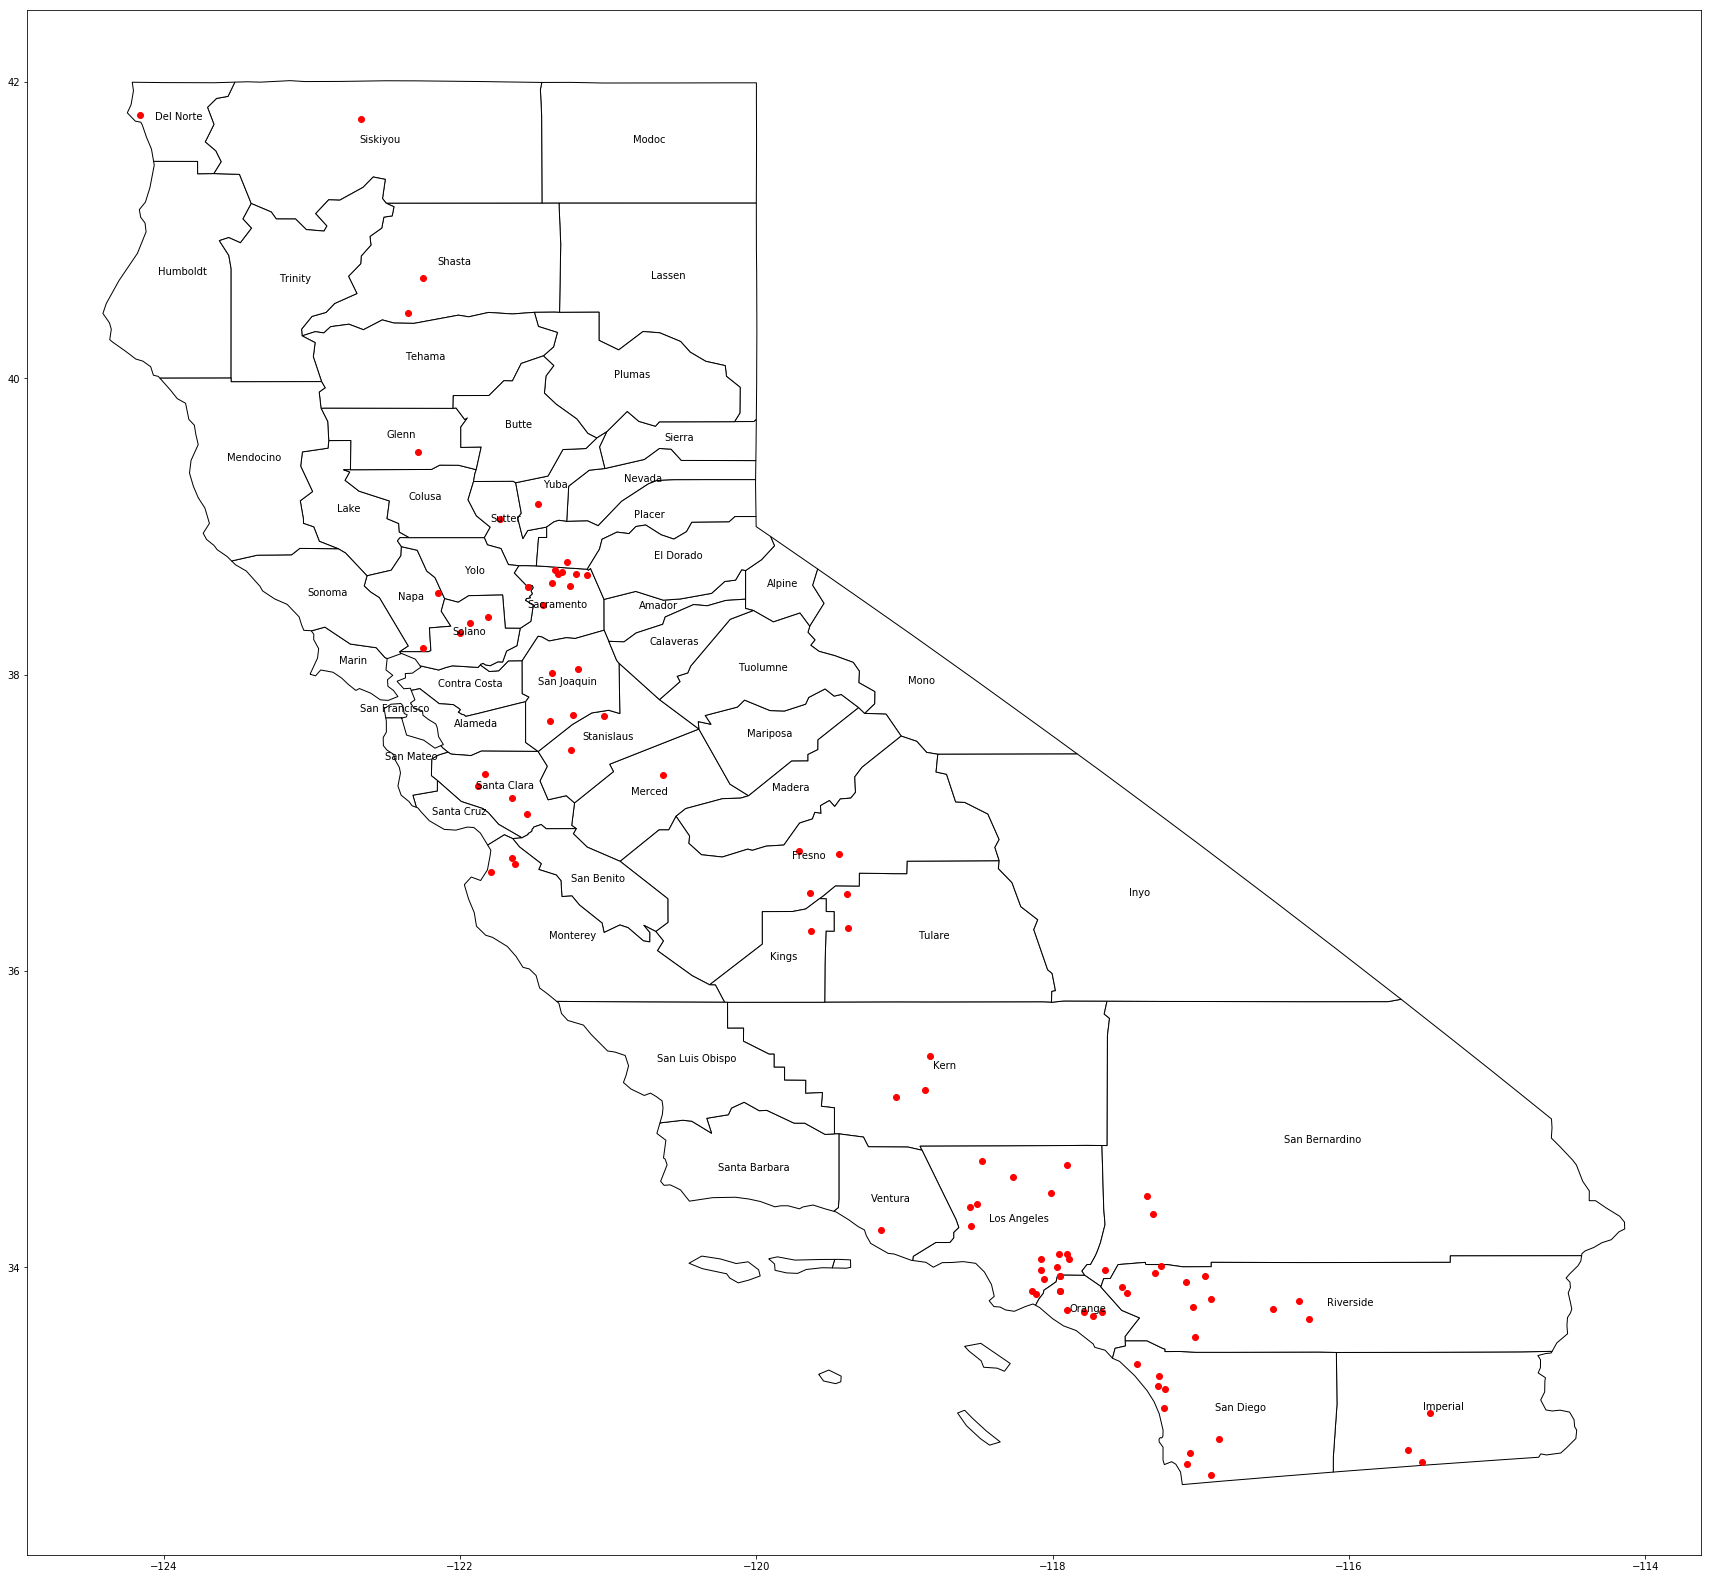

In [224]:
import geopandas as gpd
from shapely.geometry import Point
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt


fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 30
fig_size[1] = 30
plt.rcParams["figure.figsize"] = fig_size

#06 is the CA FIPS Code
shape_fil =gpd.read_file('/Users/tommylee/Desktop/cb_2016_us_county_20m/cb_2016_us_county_20m.shp')
shape_fil = shape_fil[shape_fil['STATEFP'].str.contains('06')== True].reset_index()

#x,y = poly.exterior.xy
shape_fil ["x"] = shape_fil.centroid.map(lambda shape_fil: shape_fil.x)
shape_fil ["y"] = shape_fil.centroid.map(lambda shape_fil: shape_fil.y)

subset = shape_fil[['x', 'y']]
tuples = [tuple(i) for i in subset.values]


plotty = shape_fil.plot(color='white',edgecolor='black')
for i in range(len(tuples)):
    plt.annotate(s = shape_fil.NAME[i], xy=tuples[i],horizontalalignment = 'center')

finals = gdf.plot(ax = plotty ,marker = "o",color = 'red')